<a href="https://colab.research.google.com/github/tjdux/Introduction-to-Machine-Learning-with-Python/blob/main/02_4_%EB%B6%84%EB%A5%98_%EC%98%88%EC%B8%A1%EC%9D%98_%EB%B6%88%ED%99%95%EC%8B%A4%EC%84%B1_%EC%B6%94%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [19]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

- `decision_function`, `predict_proba`: 불확실성을 추정할 수 있는 함수

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 클래스 이름 "blue", "red"로 변경
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
  train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 01 결정 함수

In [10]:
print(f"X_test.shape: {X_test.shape}")
print(f"결정 함수 결과 형태: {gbrt.decision_function(X_test).shape}")

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


- 이진 분류에서 `decision_function` 반환값의 크기: `(n_samples,)` ➡️ 각 샘플이 하나의 실수 값을 반환
- 모델이 데이터 포인트가 양성 클래스 (클래스 1) 에 속한다고 믿는 정도



In [11]:
# 결정 함수 결과
print(f"결정 함수:\n{gbrt.decision_function(X_test)[:6]}")

결정 함수:
[ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


- 양수 값 == 양성 클래스 / 음성 값 == 음성 클래스
- 결정 함수의 부호로 결과 예측 가능

In [12]:
print(f"임계치와 결정 함수 결과 비교:\n{gbrt.decision_function(X_test) > 0}")
print(f"예측:\n{gbrt.predict(X_test)}")

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [16]:
# classes_ = [음성 클래스, 양성 클래스]
# predict 함수의 결과 재현

# 불리언 값을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# classes_에 인덱스로 사용
pred = gbrt.classes_[greater_zero]

# pred와 gbrt.predict의 결과 비교
print(f"pred는 예측 결과와 같다: {np.all(pred == gbrt.predict(X_test))}")

pred는 예측 결과와 같다: True


In [17]:
# decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라짐
# decision_function의 출력 범위는 임의의 값

decision_function = gbrt.decision_function(X_test)
print(f"결정 함수 최솟값: {round(np.min(decision_function), 2)}, 최댓값: {round(np.max(decision_function), 2)}")

결정 함수 최솟값: -7.69, 최댓값: 4.29


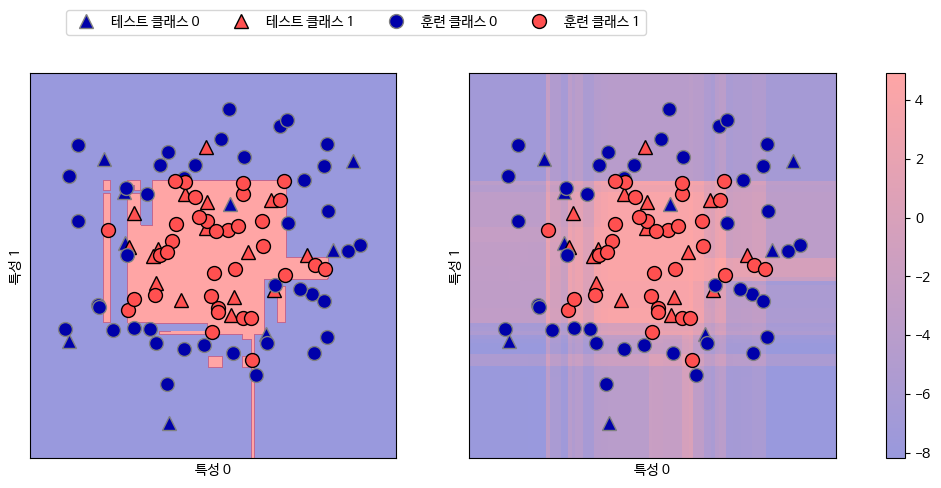

In [22]:
# 결정 경계와 결정 함수
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                           markers="^", ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                           markers="o", ax=ax)
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
fig.draw_without_rendering()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0", "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

## 02 예측 확률
- `predict_proba`: 각 클래스에 대한 확률
- 이진 분류에서 값의 크기는 항상 `(n_samples, 2)`
  - 각 행의 첫 번째 원소: 첫 번째 클래스의 예측 확률 / 두 번째 원소: 두 번째 클래스의 예측 확률
  - 값은 항상 0 ~ 1
  - 두 클래스에 대한 확률의 합은 항상 1

In [23]:
print(f"확률 값의 형태: {gbrt.predict_proba(X_test).shape}")

확률 값의 형태: (25, 2)


In [24]:
print(f"예측 확률: {gbrt.predict_proba(X_test[:6])}")

예측 확률: [[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


- 과대적합된 모델은 잘못된 예측이더라도 예측의 확신이 강한 편
- 일반적으로 복잡도가 낮은 모델은 예측에 불확실성이 더 많음
- 불확실성과 모델의 정확도가 동등하면 이 모델이 **보정**(calibration)되었다고 함
  - 보정된 모델에서 70% 확신을 가진 예측은 70%의 정확도를 낼 것

/tmp/ipython-input-3502572641.py:19: UserWarning: Adding colorbar to a different Figure <Figure size 1300x500 with 3 Axes> than <Figure size 1300x500 with 3 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scores_image, ax=axes.tolist())


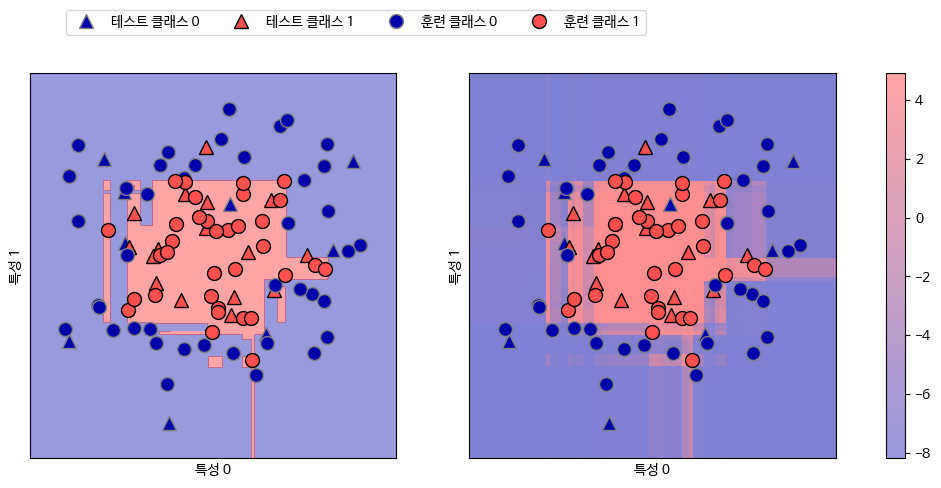

In [25]:
# 결정 경계와 클래스 1의 확률
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2
)
score_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function="predict_proba"
)

for ax in axes:
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                           markers="^", ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                           markers="o", ax=ax)
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
fig.draw_without_rendering()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0", "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

## 03 다중 분류에서의 불확실성

In [26]:
# 다중 분류 문제에서의 decision_function, predict_proba
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42
)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [27]:
# decision_function
print(f"결정 함수의 결과 형태: {gbrt.decision_function(X_test).shape}")
print(f"결정 함수 결과:\n{gbrt.decision_function(X_test)[:6, :]}")

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-0.896  1.147 -0.828]
 [ 1.161 -0.808 -0.828]
 [-0.891 -0.777  1.197]
 [-0.896  1.147 -0.828]
 [-0.898  0.965 -0.104]
 [ 1.161 -0.808 -0.828]]


- 다중 분류에서 `decision_function`의 결과값의 크기: `(n_samples, n_classes)`
- 각 열은 각 클래스에 대한 확신 점수
- 확신 점수가 가장 큰 클래스를 레이블로 예측

In [28]:
print(f"가장 큰 결정 함수의 인덱스:\n{np.argmax(gbrt.decision_function(X_test), axis=1)}")
print(f"예측:\n{gbrt.predict(X_test)}")

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [30]:
# predict_proba

print(f"예측 확률:\n{gbrt.predict_proba(X_test)[:6]}")
print(f"합: {gbrt.predict_proba(X_test)[:6].sum(axis=1)}")

예측 확률:
[[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
합: [1. 1. 1. 1. 1. 1.]


- 다중 분류에서 `predict_proba`의 출력값 크기: `n_samples, n_classes`
- 클래스 확률의 합은 1

In [32]:
# predict_proba의 결과에 argmax를 적용하여 예측을 재현
print(f"가장 큰 예측 확률의 인덱스:\n{np.argmax(gbrt.predict_proba(X_test), axis=1)}")
print(f"예측:\n{gbrt.predict(X_test)}")

가장 큰 예측 확률의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


- 열이 n_classes개일 때는 열을 가로질러서 `argmax` 함수를 적용하여 예측 결과 재현 가능
- ⚠️ 클래스가 문자열이거나 정수형을 사용하지만 연속적이지 않고 0부터 시작하지 않을 수 있음
- `predict`의 결과와 `decision_function`이나 `predict_proba`의 결과를 비교하려면 분류기의 `classes_` 속성을 사용해 클래스의 실제 이름을 얻어야 함

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

# 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]

logreg.fit(X_train, named_target)

print(f"훈련 데이터에 있는 클래스 종류: {logreg.classes_}")
print(f"예측: {logreg.predict(X_test)[:10]}")

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)

print(f"가장 큰 결정 함수의 인덱스: {argmax_dec_func[:10]}")
print(f"인덱스를 classes_에 연결: {logreg.classes_[argmax_dec_func][:10]}")

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
